<a href="https://colab.research.google.com/github/BaThienPhan/AIO_Exercise_Module_5/blob/feature_week1/Titanic_Regesstion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Tải bộ dữ liệu: Các bạn tải bộ dữ liệu tại đây.

In [ ]:
#2. Import libraries:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
from sklearn . model_selection import train_test_split
from sklearn . preprocessing import StandardScaler

In [ ]:
#3. Đọc dữ liệu: Sử dụng thư viện pandas để đọc file .csv thành DataFrame như sau:
dataset_path = "/content/drive/MyDrive/Exercise/Module 4/week 4/titanic_modified_dataset.csv"#
df = pd. read_csv (dataset_path ,index_col ='PassengerId')

In [ ]:
#4. Chia biến X, y: Chuyển đổi DataFrame hiện tại thành array và tách hai biến X, y:
dataset_arr = df. to_numpy () . astype (np. float64 )
#Lấy 8 cột đầu (Trước cột -1)
X, y = dataset_arr[:,: -1] ,dataset_arr[:,-1]

In [ ]:
#5. Thêm bias vào X: Khi sử dụng thư viện, bias sẽ được thêm tự động vào X. Tuy
#nhiên, khi triển khai lại từ đầu, chúng ta cần phải tự thêm bias vào mỗi mẫu dữ liệu,
#nhằm thỏa mãn công thức hàm dự đoán:
intercept = np.ones ((X.shape [0],1))
X_b = np. concatenate(( intercept , X),axis=1)

In [ ]:
#6. Chia tập train, val, test: Sau khi đã hoàn chỉnh biến X, chúng ta tiến hành chia
#ba bộ train, val, test với tỉ lệ 7:2:1. Thực hiện như sau:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train,X_val,y_train,y_val = train_test_split (X_b , y,test_size = val_size ,random_state = random_state ,shuffle = is_shuffle)

X_train,X_test,y_train,y_test = train_test_split (X_train , y_train ,test_size = test_size ,random_state = random_state ,shuffle = is_shuffle)

In [ ]:
#7. Chuẩn hóa dữ liệu: Ta sử dụng X_train vừa tạo ở bước trên fit vào hàm chuẩn hóa
#StandardScaler. Sau đó, đem scaler này chuẩn hóa cho tập X_val và X_test (lưu ý
#rằng ta không chuẩn hóa bias nên sẽ bỏ qua cột đầu tiên trong X):
normalizer = StandardScaler ()
X_train [: , 1:] = normalizer.fit_transform ( X_train [: , 1:])
X_val [:,1:] = normalizer.transform(X_val[: , 1:])
X_test [:,1:] = normalizer.transform(X_test[: , 1:])

In [ ]:
#8. Cài đặt các hàm quan trọng: Để thuận tiện trong việc cài đặt chương trình, ta
#định nghĩa sẵn một số hàm sẽ được dùng trong quá trình huấn luyện mô hình:
#Hàm sigmoid: Xây dựng hàm sigmoid với công thức như sau:
def sigmoid (z) :
  return 1 / (1 + np.exp(-z))
#Hàm dự đoán:
def predict (X, theta ):
  dot_product = np. dot (X, theta )
  y_hat = sigmoid ( dot_product )
  return y_hat
#Hàm tính loss: Xây dựng hàm tính loss với công thức Cross-entropy như sau:
def compute_loss (y_hat , y) :
  loss = - y * np. log (y_hat) - (1 - y) * np. log (1 - y_hat)
  return loss. mean ()
#Hàm tính gradient: Xây dựng hàm tính gradient với công thức như sau:

def compute_gradient (X, y, y_hat ) :
  m = X. shape [0]
  gradient = np.dot (X.T, (y_hat - y)) / m
  return gradient

#Hàm cập nhật trọng số: Khi áp dụng giải thuật Gradient Descent, trọng số
#theta sẽ được cập nhật bằng công thức như sau:

def update_theta (theta , gradient , lr) :
  return theta - lr * gradient
#Hàm tính độ chính xác: Xây dựng hàm tính độ chính xác với công thức như

def compute_accuracy (X, y, theta ) :
  y_hat = predict (X, theta ) . round ()
  acc = ( y_hat == y) . mean ()
  return acc

In [ ]:
#9. Khai báo các siêu tham số và khởi tạo weights:
lr = 0.01
epochs = 100
batch_size = 16

np. random . seed ( random_state )
theta = np. random . uniform (size = X_train . shape [1])

In [ ]:
#Huấn luyện mô hình
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range ( epochs ) :
  train_batch_losses = []
  train_batch_accs = []
  val_batch_losses = []
  val_batch_accs = []

  for i in range (0 , X_train . shape [0] , batch_size ) :
    X_i = X_train [i:i+ batch_size ]
    y_i = y_train [i:i+ batch_size ]

    y_hat = predict (X_i , theta )

    train_loss = compute_loss (y_hat , y_i )

    gradient = compute_gradient (X_i , y_i , y_hat )

    theta = update_theta (theta , gradient , lr)


    train_batch_losses . append ( train_loss )

    train_acc = compute_accuracy ( X_train , y_train , theta )
    train_batch_accs . append ( train_acc )

    y_val_hat = predict (X_val , theta )
    val_loss = compute_loss ( y_val_hat , y_val )
    val_batch_losses . append ( val_loss )

    val_acc = compute_accuracy (X_val , y_val , theta )
    val_batch_accs . append ( val_acc )

  train_batch_loss = sum ( train_batch_losses ) / len (train_batch_losses )
  val_batch_loss = sum ( val_batch_losses ) / len ( val_batch_losses )
  train_batch_acc = sum ( train_batch_accs ) / len ( train_batch_accs )
  val_batch_acc = sum ( val_batch_accs ) / len ( val_batch_accs )

  train_losses.append(train_batch_loss)
  val_losses.append(val_batch_loss)
  train_accs.append(train_batch_acc)
  val_accs.append(val_batch_acc)
  print (f"\ nEPOCH { epoch + 1}:\ tTraining loss : { train_batch_loss :.3f}\ tValidation loss : { val_batch_loss :.3f}")

\ nEPOCH 1:\ tTraining loss : 0.411\ tValidation loss : 0.524
\ nEPOCH 2:\ tTraining loss : 0.411\ tValidation loss : 0.524
\ nEPOCH 3:\ tTraining loss : 0.411\ tValidation loss : 0.524
\ nEPOCH 4:\ tTraining loss : 0.411\ tValidation loss : 0.524
\ nEPOCH 5:\ tTraining loss : 0.411\ tValidation loss : 0.524
\ nEPOCH 6:\ tTraining loss : 0.411\ tValidation loss : 0.524
\ nEPOCH 7:\ tTraining loss : 0.411\ tValidation loss : 0.524
\ nEPOCH 8:\ tTraining loss : 0.411\ tValidation loss : 0.524
\ nEPOCH 9:\ tTraining loss : 0.411\ tValidation loss : 0.524
\ nEPOCH 10:\ tTraining loss : 0.411\ tValidation loss : 0.524
\ nEPOCH 11:\ tTraining loss : 0.411\ tValidation loss : 0.525
\ nEPOCH 12:\ tTraining loss : 0.411\ tValidation loss : 0.525
\ nEPOCH 13:\ tTraining loss : 0.411\ tValidation loss : 0.525
\ nEPOCH 14:\ tTraining loss : 0.411\ tValidation loss : 0.525
\ nEPOCH 15:\ tTraining loss : 0.411\ tValidation loss : 0.525
\ nEPOCH 16:\ tTraining loss : 0.411\ tValidation loss : 0.525
\

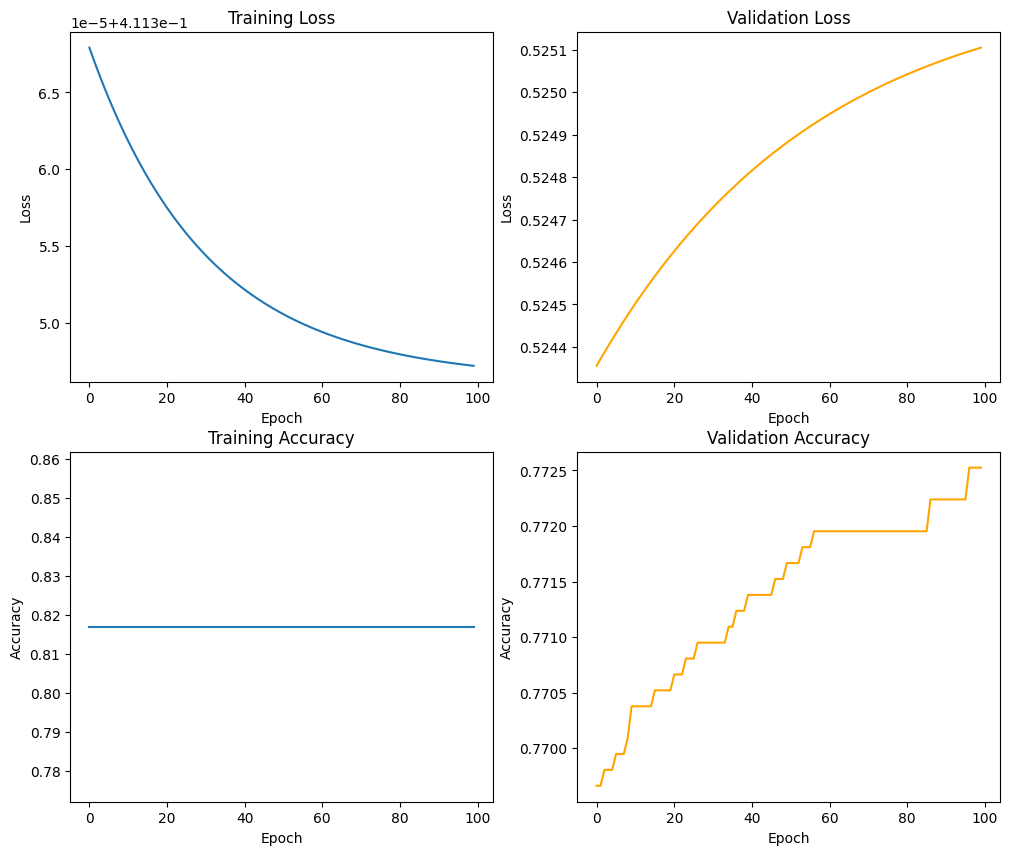

In [ ]:
#Bên cạnh đó, với các danh sách batch loss và batch accuracy trên hai bộ dữ liệu train
#và val, chúng ta còn có thể trực quan hóa kết quả huấn luyện lên đồ thị như sau:
fig , ax = plt . subplots (2 , 2 , figsize =(12 , 10) )
ax [0 , 0]. plot ( train_losses )
ax [0 , 0]. set ( xlabel ='Epoch', ylabel ='Loss')
ax [0 , 0]. set_title ('Training Loss')

ax [0 , 1]. plot ( val_losses , 'orange')
ax [0 , 1]. set ( xlabel ='Epoch', ylabel ='Loss')
ax [0 , 1]. set_title ('Validation Loss')

ax [1 , 0]. plot ( train_accs )
ax [1 , 0]. set ( xlabel ='Epoch', ylabel ='Accuracy')
ax [1 , 0]. set_title ('Training Accuracy')

ax [1 , 1]. plot ( val_accs , 'orange')
ax [1 , 1]. set ( xlabel ='Epoch', ylabel ='Accuracy')
ax [1 , 1]. set_title ('Validation Accuracy')

plt . show ()

In [ ]:
#11. Đánh giá mô hình: Sử dụng bộ trọng số mô hình tìm được sau quá trình huấn
#luyện, ta đánh giá độ chính xác của mô hình trên hai tập val và test:
val_set_acc = compute_accuracy (X_val , y_val , theta )
test_set_acc = compute_accuracy ( X_test , y_test , theta )
print ('Evaluation on validation and test set :')
print (f'Accuracy : { val_set_acc }')
print (f'Accuracy : { test_set_acc }')

Evaluation on validation and test set :
Accuracy : 0.776536312849162
Accuracy : 0.7865168539325843
